In [155]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from covid.data.pt.covid import get_data
sns.set()

In [156]:
proxies = {
 "http": "",
 "https": "",
}

In [157]:
proxies = None


In [262]:
dados_por_concelho_raw = get_data()
    

In [254]:
concelhos = pd.read_csv('/Users/hmonteiro/Documents/personal/concelhos.csv')
concelhos = concelhos[~concelhos['Nível I'].isna()]
populacao_por_concelho = pd.read_csv('/Users/hmonteiro/Documents/personal/populacao.csv')
populacao = pd.merge(populacao_por_concelho, concelhos, left_on='concelho', right_on='Concelhos').drop(columns='concelho').copy()
populacao = populacao.rename(columns = {'populacao2018':'populacao_concelho'})
populacao['populacao_distrito'] = populacao.groupby('Distrito').populacao_concelho.transform('sum')
populacao['populacao_nivel3'] = populacao.groupby('Nível III').populacao_concelho.transform('sum')
populacao['populacao_nivel2'] = populacao.groupby('Nível II').populacao_concelho.transform('sum')

In [272]:
populacao[['Distrito','populacao_concelho']].groupby('Distrito').sum()

,populacao_concelho
Distrito,
Aveiro,695702
Beja,141178
Braga,828650
Bragança,124571
Castelo Branco,179038
Coimbra,405267
Corvo,465
Faial,14542
Faro,438864


In [264]:
dados_por_concelho_raw.columns

Index(['Concelho', 'ConfirmadosAcumulado', 'ConfirmadosNovos', 'Data'], dtype='object')

In [257]:
populacao.columns

Index(['populacao2011', 'populacao_concelho', 'densidade2011', 'densidade2018',
       'Nível I', 'Nível II', 'Nível III', 'Distrito', 'Concelhos',
       'populacao_distrito', 'populacao_nivel3', 'populacao_nivel2'],
      dtype='object')

In [258]:
piores_concelhos_absoluto = dados_extra.groupby('Concelho').apply(lambda x: x.sort_values(by='Data').iloc[-1]).sort_values(by='confirmados_por_milhao', ascending=False).head(20).Concelho

In [255]:
dados_por_concelho = dados_por_concelho.drop_duplicates(['Data', 'Concelho']).pivot('Data','Concelho').resample('d').first()
dados_por_concelho = pd.merge(dados_por_concelho)
dados_por_concelho['confirmados_por_milhao'] = dados_por_concelho.
dados_por_concelho_sort = dados_por_concelho.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_concelho = ((dados_por_concelho.ConfirmadosAcumulado-dados_por_concelho.ConfirmadosAcumulado.shift(7))/dados_por_concelho.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_concelho = crescimento_semanal_concelho.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_concelho*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_concelho.confirmados_por_milhao[dados_por_concelho_sort]:
        if c in top_crescimento_concelho:
            plt.plot(dados_por_concelho.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_concelho.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.42, 0.5))
    plt.xlim((dados_por_concelho.index[0], dados_por_concelho.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por concelho.\n'
              'Realce para os 3 distritos com maior aumento percentual nos últimos 7 dias.')

AttributeError: 'Series' object has no attribute 'confirmados_por_milhao'

(0, 15000)

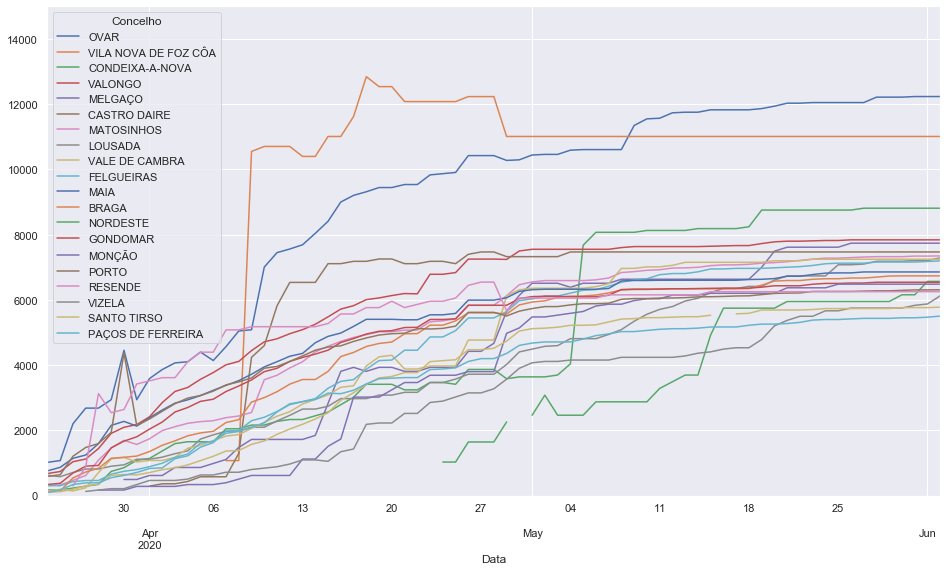

In [164]:
tabela_concelho.confirmados_por_milhao[piores_concelhos_absoluto].plot(figsize=(16,9))
plt.ylim((0,15000))

In [216]:
dados_por_distrito.columns

Index(['ConfirmadosAcumulado', 'populacao2018_x', 'populacao2018_y'], dtype='object')

In [227]:
dados_por_distrito = dados_extra.groupby(['Data','Distrito']).agg({'ConfirmadosAcumulado':'sum','populacao2018':'sum'})
# dados_por_distrito['populacao2018'] = dados_extra.groupby('Distrito').populacao2018.transform('sum')
dados_por_distrito = pd.merge(dados_por_distrito, dados_extra.groupby('Distrito').populacao2018.sum(), left_on='Distrito', right_index=True) 
dados_por_distrito['confirmados_por_milhao'] = dados_por_distrito.ConfirmadosAcumulado/(dados_por_distrito.populacao2018/1e6)
dados_por_distrito = dados_por_distrito.unstack()
dados_por_distrito.set_index(pd.to_datetime(dados_por_distrito.index, unit='ms'), inplace=True)
dados_por_distrito = dados_por_distrito.resample('d').first()
dados_por_distrito_sort = dados_por_distrito.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_distrito = ((dados_por_distrito.ConfirmadosAcumulado-dados_por_distrito.ConfirmadosAcumulado.shift(7))/dados_por_distrito.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_distrito = crescimento_semanal_distrito.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_distrito*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_distrito.confirmados_por_milhao[dados_por_distrito_sort]:
        if c in top_crescimento_distrito:
            plt.plot(dados_por_distrito.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_distrito.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.42, 0.5))
    plt.xlim((dados_por_distrito.index[0], dados_por_distrito.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por distrito.\n'
              'Realce para os 3 distritos com maior aumento percentual nos últimos 7 dias.')

KeyError: ('Distrito', 'ConfirmadosAcumulado')

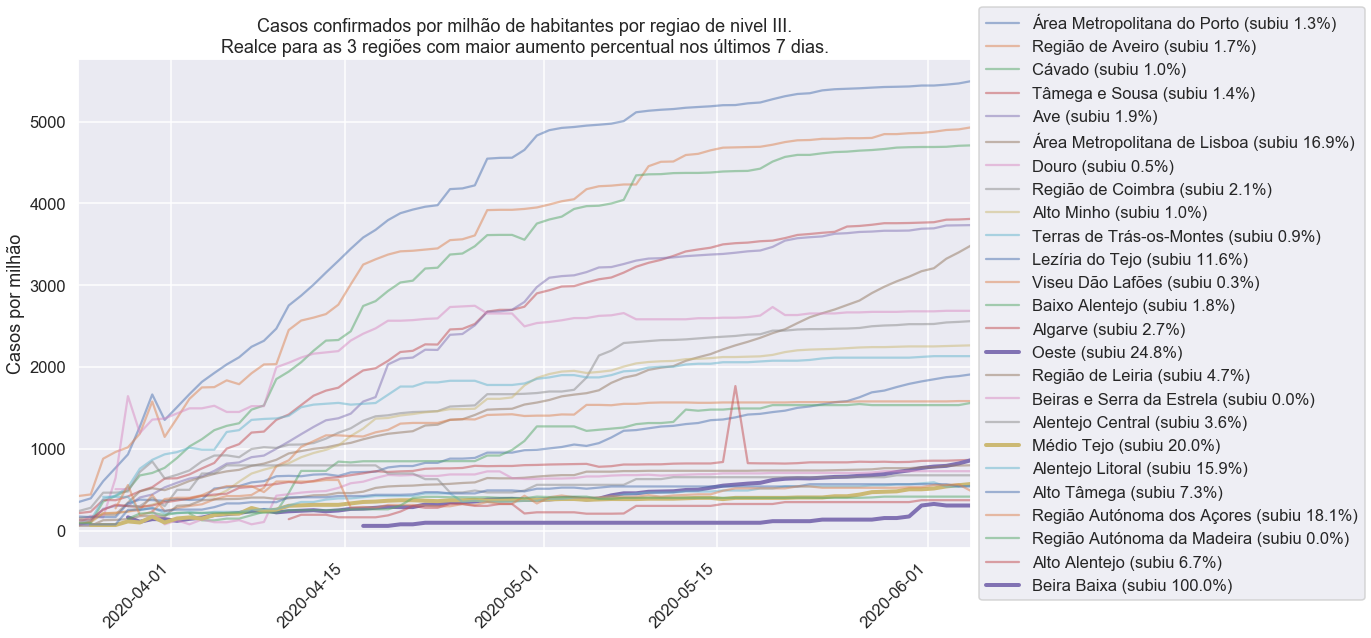

In [195]:
dados_por_nivel_3 = dados_extra.groupby(['Data','Nível III']).agg({'ConfirmadosAcumulado':'sum','populacao2018':'sum'})
dados_por_nivel_3['confirmados_por_milhao'] = dados_por_nivel_3.ConfirmadosAcumulado/(dados_por_nivel_3.populacao2018/1e6)
dados_por_nivel_3 = dados_por_nivel_3.unstack()
dados_por_nivel_3.set_index(pd.to_datetime(dados_por_nivel_3.index, unit='ms'), inplace=True)
dados_por_nivel_3_sort = dados_por_nivel_3.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_nivel3 = ((dados_por_nivel_3.ConfirmadosAcumulado-dados_por_nivel_3.ConfirmadosAcumulado.shift(7))/dados_por_nivel_3.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_nivel3 = crescimento_semanal_nivel3.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_nivel3*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_nivel_3.confirmados_por_milhao[dados_por_nivel_3_sort]:
        if c in top_crescimento_nivel3:
            plt.plot(dados_por_nivel_3.confirmados_por_milhao[c], label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_nivel_3.confirmados_por_milhao[c], label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.45, 0.5))
    plt.xlim((dados_por_nivel_3.index[0], dados_por_nivel_3.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por regiao de nivel III.\n'
              'Realce para as 3 regiões com maior aumento percentual nos últimos 7 dias.')


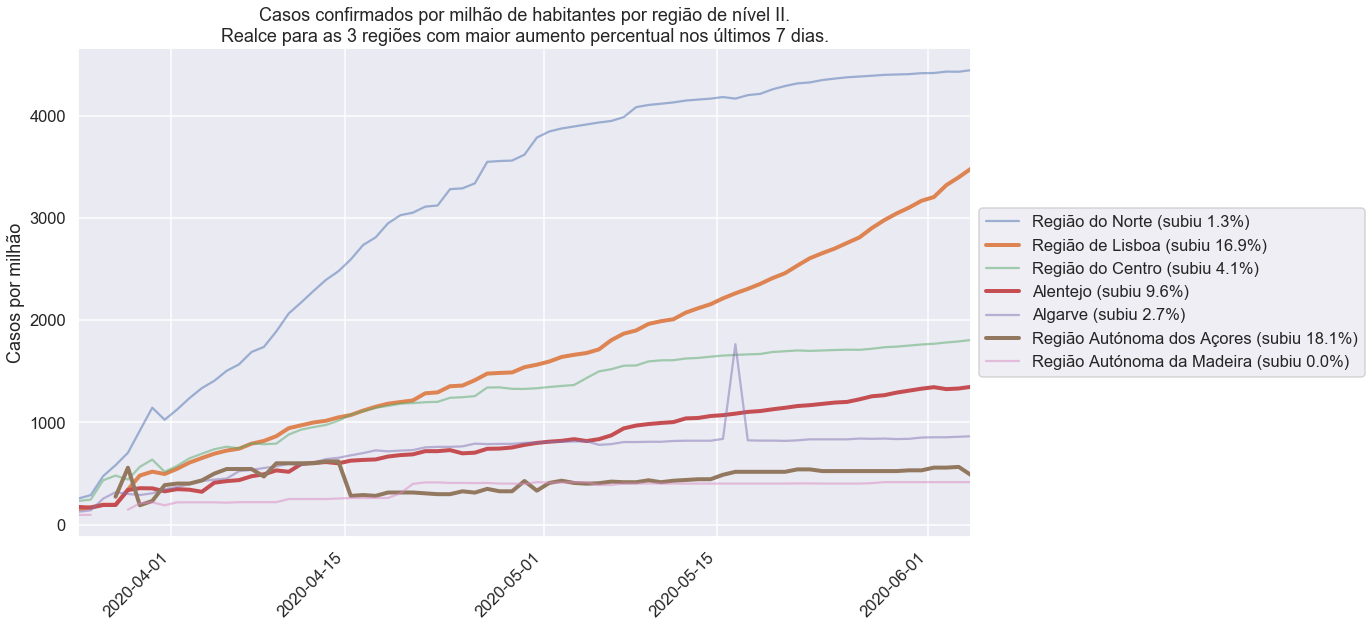

In [196]:
dados_por_nivel_2 = dados_extra.groupby(['Data','Nível II']).agg({'ConfirmadosAcumulado':'sum','populacao2018':'sum'})
dados_por_nivel_2['confirmados_por_milhao'] = dados_por_nivel_2.ConfirmadosAcumulado/(dados_por_nivel_2.populacao2018/1e6)
dados_por_nivel_2 = dados_por_nivel_2.unstack()
dados_por_nivel_2.set_index(pd.to_datetime(dados_por_nivel_3.index, unit='ms'), inplace=True)
dados_por_nivel_2_sort = dados_por_nivel_2.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_nivel2 = ((dados_por_nivel_2.ConfirmadosAcumulado-dados_por_nivel_2.ConfirmadosAcumulado.shift(7))/dados_por_nivel_2.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_nivel2 = crescimento_semanal_nivel2.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_nivel2*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_nivel_2.confirmados_por_milhao[dados_por_nivel_2_sort]:
        if c in top_crescimento_nivel2:
            plt.plot(dados_por_nivel_2.confirmados_por_milhao[c], label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_nivel_2.confirmados_por_milhao[c], label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.45, 0.5))
    plt.xlim((dados_por_nivel_2.index[0], dados_por_nivel_2.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por regiāo de nível II.\n'
              'Realce para as 3 regiões com maior aumento percentual nos últimos 7 dias.')


In [ ]:
tabela_concelho.ConfirmadosAcumulado['VILA REAL']